## Default of Credit Card Clients

Dataset

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Content
There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

## Importación de Librerias 

In [ ]:
!pip install imbalanced-learn
!pip install joblib
!pip install pydotplus
!pip install pydot
!pip install graphviz
!pip install Pillow
!pip install Image

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
from datetime import datetime 
import time
import sys
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, precision_recall_curve, f1_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

     |████████████████████████████████| 7.9MB 7.0MB/s 
  Created wheel for Image: filename=image-1.5.33-py2.py3-none-any.whl size=19482 sha256=1636b9431de709fd04f529f378c10e33f81d1cf334899892474d48144b01b426
  Stored in directory: /root/.cache/pip/wheels/87/4c/60/d5904e69c837fcdea7e03ffa0c657f35ced7e398c6f3ca17cc
Successfully built Image


## Carga Datos 

In [ ]:
#Lectura del archivo en Github
#Header: Identificación del primer registro como la cabecera de la base de datos
#Index: Identificador unico de la base de datos
#Visualización de 5 registros    
df0 = pd.read_excel(r'https://github.com/joatamayoav/Trabajo_Final_Analitica_Predictiva/blob/1bd46e511fd7ae24cecde177b8a9424cef556717/Modelo%201%20-%20BD%20-%20Clientes%20en%20Default.xls?raw=true',
     header=1,
     index_col='ID'
    )
df0.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
#Renombra variables en de mayúsculas a minúsculas
#Cambiar variable y de "default payment next month" a "Variable dependiente"
df0.rename(columns=lambda x: x.lower(), inplace=True)
df0.rename(columns={"default payment next month":"Variable dependiente"}, inplace=True) 
df0.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,Variable dependiente
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# Se crea copia del Dataframe original para no dañarlo
df = df0.copy()
df_Resumen = df.head()
df_Resumen.to_csv('Resumen_DF.csv')
df.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,Variable dependiente
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Análisis Descriptivo

In [ ]:
#dtypes: Visualizar variables y tipo de variables de la data
#df.shape: Cuantas variables y registros hay en la data
#Estatidisticas básicas de la data
df_Variables=df.dtypes
df_Variables.to_csv('Variables_DF.csv')
print(df.dtypes)
print(df.shape)
df.describe()

limit_bal               int64
sex                     int64
education               int64
marriage                int64
age                     int64
pay_0                   int64
pay_2                   int64
pay_3                   int64
pay_4                   int64
pay_5                   int64
pay_6                   int64
bill_amt1               int64
bill_amt2               int64
bill_amt3               int64
bill_amt4               int64
bill_amt5               int64
bill_amt6               int64
pay_amt1                int64
pay_amt2                int64
pay_amt3                int64
pay_amt4                int64
pay_amt5                int64
pay_amt6                int64
Variable dependiente    int64
dtype: object
(29601, 24)


,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,Variable dependiente
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,2.960100e+04,29601.000000,29601.000000,29601.000000,29601.000000,2.960100e+04,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,167550.544914,1.603189,1.815479,1.555454,35.464072,-0.014932,-0.131313,-0.163440,-0.218303,-0.263978,-0.287558,50957.432012,48942.189554,4.680320e+04,43122.554204,40235.545184,38858.449816,5649.560319,5.894788e+03,5198.415898,4828.659268,4795.032735,5181.326374,0.223134
std,129944.020953,0.489244,0.710399,0.518092,9.213243,1.124503,1.199642,1.199793,1.172220,1.136217,1.152206,73370.242404,70923.985151,6.912389e+04,64196.383913,60699.344884,59519.893043,16568.264941,2.308919e+04,17580.914806,15711.057992,15244.217154,17657.260739,0.416355
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3528.000000,2970.000000,2.652000e+03,2329.000000,1780.000000,1278.000000,1000.000000,8.250000e+02,390.000000,298.000000,259.000000,138.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22259.000000,21050.000000,2.003500e+04,19005.000000,18091.000000,17118.000000,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66623.000000,63497.000000,5.983000e+04,54271.000000,50072.000000,49121.000000,5005.000000,5.000000e+03,4500.000000,4014.000000,4042.000000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


## Análisis Exploratorio

In [ ]:
# Identificación de nulos por variable
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Variable dependiente,pay_amt6,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,limit_bal
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


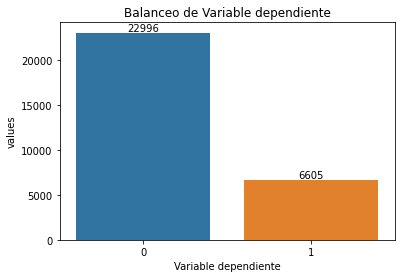

In [ ]:
# Creamos dataframe Variable dependiente se le asigna a df1
# Dimensiones del plot (6,4)
# Asignamos titulo
# Definición de colores}
# Se asigna la variables del gráfico x = Variable dependiente y y = conteo 
#
temp = df["Variable dependiente"].value_counts()
df1 = pd.DataFrame({'Variable dependiente': temp.index,'values': temp.values})
plt.figure(figsize = (6,4))
plt.title('Balanceo de Variable dependiente')
sns.set_color_codes("pastel")
graph = sns.barplot(x = 'Variable dependiente', y="values", data=df1)
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black',
                    xytext = (0, 0), 
                    textcoords = 'offset points'
                    )
locs, labels = plt.xticks()
plt.savefig('Balanceo.jpg')

## Modelación

###  Definición Metricas del Modelo

In [ ]:
# Definición del dataFrame de metricas
metrics = pd.DataFrame(index=['accuracy', 'f1_score', 'precision', 'recall', 'roc_auc_score', 'Tiempo de ejecución'],
                       columns=['BernoulliNB', 'GaussianNB', 'LogisticRegresion', 'kNN', 'DecisionTree', 'AdaBoost', 'RandomForest', 'GradientBoosting', 'RedesNeuronales' , 'SVMs'])
metrics.round(4)
metrics

,BernoulliNB,GaussianNB,LogisticRegresion,kNN,DecisionTree,AdaBoost,RandomForest,GradientBoosting,RedesNeuronales,SVMs
accuracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f1_score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
precision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
roc_auc_score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tiempo de ejecución,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###  Definición Gráfica del Modelo

In [ ]:
# Creación de la matriz de confusión
# Se define la función "plot_confusion_matrix" se le asignan variables y parametros a imprimir
# La primera parte del codigo que se identifica con las siglas plt es para configuración de variables y aspecto de grafico 
# Por ejemplo: plt.imshow: define el grado de difuminasión del grafico de confusión
# En el for se hace la identificación de positivos, de negativos, falsos positivos y falsos negativos y se asigna colores para dichas variables
# Se condigura el gráfico conforme a x y y label

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Greys):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(cm.shape[1])
    plt.xticks(tick_marks, rotation=0)
    ax = plt.gca()
    ax.set_xticklabels((ax.get_xticks()+0).astype(str))
    plt.yticks(tick_marks)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.0f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')   

### Conjuntos de Entrenamiento y Prueba 

In [ ]:
# Se define la variable Dependientes
# Elimina variable dependiente para entrenar
# Se aplica el RobustScaler para transformar las variables del modelo y hacer el fit
# Se define el proporción de el tamaño del datatest y numero minimo de iteraciones y la variable dependiente del Modelo 
target = 'Variable dependiente'
X = df.drop('Variable dependiente', axis = 1)
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
Y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=100, stratify=Y)


### NB 

In [ ]:
# Se importa la libreria de modelo correspondiente
from sklearn.naive_bayes import BernoulliNB


#
# Se crean los parametros correspondientes al modelo, esto con el objetivo de optimizarlos por medio de la librería GridSearchCV
parameters = [{'alpha':np.linspace(0.0,1,5),'binarize':np.linspace(0.0,1,5),'fit_prior': ["True","False"]}]
# Se ejecuta la librería GridSearchCV
gnb = GridSearchCV(
    BernoulliNB(),
    parameters,
    cv=4
)
# Entrenamiento del modelo y selección de la combinación óptima de parámetros
gnb.fit(X_train, y_train)
y_pred_test = gnb.predict(X_test)
# Evaluación para matriz de confusión
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)
# Calculo del tiempo en ejecución y definición de metricas
start_time = time.time()
metrics.loc['accuracy','BernoulliNB'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['f1_score','BernoulliNB'] = f1_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','BernoulliNB'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','BernoulliNB'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','BernoulliNB'] = roc_auc_score(y_pred_test, y_test)
metrics.loc['Tiempo de ejecución','BernoulliNB'] = (time.time() - start_time)


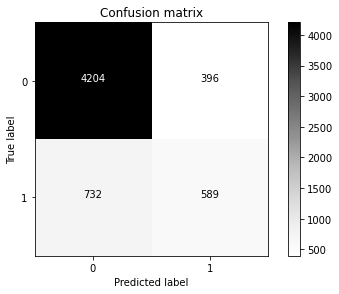

In [ ]:
#Reporte de Matriz de Confusión Modelo BernoulliNB
CM_BernoulliNB = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
plot = (plot_confusion_matrix(CM_BernoulliNB))
plt.savefig('Confusion Matrix BernoulliNB')

In [ ]:
# Se importa la libreria de modelo correspondiente
from sklearn.naive_bayes import GaussianNB

# Se crean los parametros correspondientes al modelo, esto con el objetivo de optimizarlos por medio de la librería GridSearchCV
parameters = [{'var_smoothing':np.logspace(0,-9, num=100)}]

# Se ejecuta la librería GridSearchCV, cv hace referencia al metodo de validación cruzada en este caso K-Folds=4 divide los datos 
# en 4 de secciones de prueba los cuales no se mezclan de forma predeterminada
gaussian = GridSearchCV(
    GaussianNB(),
    parameters,
    cv=4
)
# Entrenamiento del modelo y selección de la combinación óptima de parámetros
gaussian.fit(X_train, y_train)
y_pred_test = gnb.predict(X_test)
# Evaluación para matriz de confusión
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)
# Calculo del tiempo en ejecución y definición de metricas
start_time = time.time()
metrics.loc['accuracy','GaussianNB'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['f1_score','GaussianNB'] = f1_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','GaussianNB'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','GaussianNB'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','GaussianNB'] = roc_auc_score(y_pred_test, y_test)
metrics.loc['Tiempo de ejecución','GaussianNB'] = (time.time() - start_time)


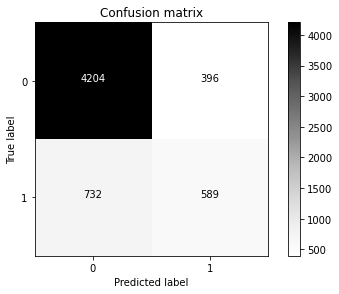

In [ ]:
#Reporte de Matriz de Confusión Modelo GaussianNB
CM_GaussianNB = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
plot = (plot_confusion_matrix(CM_GaussianNB))
plt.savefig('Confusion Matrix GaussianNB')

### Regresión Logística

In [ ]:
# Se importa la libreria de modelo correspondiente
from sklearn.linear_model import LogisticRegression

# Se crean los parametros correspondientes al modelo, esto con el objetivo de optimizarlos por medio de la librería GridSearchCV
parameters = [{'penalty': ["none","l1", "l2", "elasticnet"],
               'C': [0.0], 
               'solver': [ "lbfgs", "sag", "saga"],
               'class_weight': ['None', 'dict', 'balanced'],
               'random_state': [123],
               'warm_start': ["True"],
               'n_jobs': [-1]}]

# Se ejecuta la librería GridSearchCV
logisticRegression = GridSearchCV(
    LogisticRegression(),
    parameters,
    cv = 4
)

# Entrenamiento del modelo y selección de la combinación óptima de parámetros
logisticRegression.fit(X_train, y_train)
y_pred_test = logisticRegression.predict(X_test)
#
# Evaluación
#
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)

# Calculo del tiempo en ejecución y definición de metricas
start_time = time.time()
metrics.loc['accuracy','LogisticRegresion'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['f1_score','LogisticRegresion'] = f1_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','LogisticRegresion'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','LogisticRegresion'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','LogisticRegresion'] = roc_auc_score(y_pred_test, y_test)
metrics.loc['Tiempo de ejecución','LogisticRegresion'] = (time.time() - start_time)


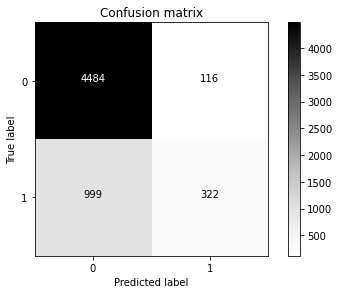

In [ ]:
#Reporte de Matriz de Confusión Modelo LogisticRegresion
CM_LogisticRegresion = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
plot = (plot_confusion_matrix(CM_LogisticRegresion))
plt.savefig('Confusion Matrix LogisticRegresion')

### kNN

In [ ]:
# Se importa la libreria de modelo correspondiente
from sklearn.neighbors import KNeighborsClassifier

#
# Se crean los parametros correspondientes al modelo, esto con el objetivo de optimizarlos por medio de la librería GridSearchCV
parameters = [{'n_neighbors':[9,10,11],
               'weights': ["uniform","distance"],
               'n_jobs': [-1]}]

# Se ejecuta la librería GridSearchCV
knn = GridSearchCV(
    KNeighborsClassifier(),
    parameters,
    cv=4
)

# Entrenamiento del modelo y selección de la combinación óptima de parámetros
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)

# Evaluación para matriz de confusión
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)


# Calculo del tiempo en ejecución y definición de metricas
start_time = time.time()
metrics.loc['accuracy','kNN'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['f1_score','kNN'] = f1_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','kNN'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','kNN'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','kNN'] = roc_auc_score(y_pred_test, y_test)
metrics.loc['Tiempo de ejecución','kNN'] = (time.time() - start_time)


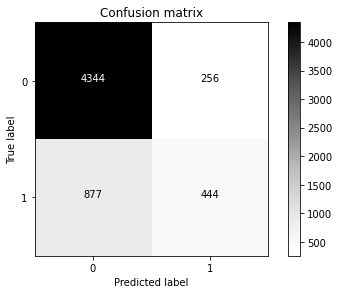

In [ ]:
#Reporte de Matriz de Confusión Modelo kNN
CM_kNN = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
plot = (plot_confusion_matrix(CM_kNN))
plt.savefig('Confusion Matrix kNN')

###DecisionTreeClassifier

In [ ]:
# Se importa la libreria de modelo correspondiente
from sklearn.tree import DecisionTreeClassifier

# Se crean los parametros correspondientes al modelo, esto con el objetivo de optimizarlos por medio de la librería GridSearchCV
parameters = [{'max_depth': np.arange(3, 10),
             'criterion' : ['gini'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}]


# # Se ejecuta la librería GridSearchCV
decisiontree = GridSearchCV(
    DecisionTreeClassifier(),
    parameters,
    cv=4
)

# Entrenamiento del modelo y selección de la combinación óptima de parámetros
decisiontree.fit(X_train, y_train)
y_pred_test = decisiontree.predict(X_test)

# Evaluación para matriz de confusión
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)

# Calculo del tiempo en ejecución y definición de metricas
start_time = time.time()
metrics.loc['accuracy','DecisionTree'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['f1_score','DecisionTree'] = f1_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','DecisionTree'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','DecisionTree'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','DecisionTree'] = roc_auc_score(y_pred_test, y_test)
metrics.loc['Tiempo de ejecución','DecisionTree'] = (time.time() - start_time)



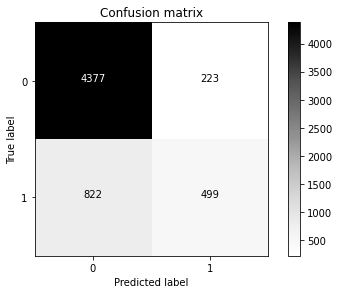

In [ ]:
#Reporte de Matriz de Confusión Modelo DecisionTree
CM_DecisionTree = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
plot = (plot_confusion_matrix(CM_DecisionTree))
plt.savefig('Confusion Matrix DecisionTree')

### Ensambles de Modelos

In [ ]:
# Se importa la libreria de modelo correspondiente
from sklearn.ensemble import AdaBoostClassifier

# Se crean los parametros correspondientes al modelo, esto con el objetivo de optimizarlos por medio de la librería GridSearchCV
parameters = [{'n_estimators':[50,60,70,80]}]

# Se ejecuta la librería GridSearchCV

AdaBoost =  GridSearchCV(
    AdaBoostClassifier(),
    parameters,
    cv=4
)

# AdaBoostClassifier(n_estimators=10)

# Entrenamiento del modelo y selección de la combinación óptima de parámetros
AdaBoost.fit(X_train, y_train)
y_pred_test = AdaBoost.predict(X_test)

# Evaluación para matriz de confusión
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)

# Calculo del tiempo en ejecución y definición de metricas
start_time = time.time()
metrics.loc['accuracy','AdaBoost'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['f1_score','AdaBoost'] = f1_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','AdaBoost'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','AdaBoost'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','AdaBoost'] = roc_auc_score(y_pred_test, y_test)
metrics.loc['Tiempo de ejecución','AdaBoost'] = (time.time() - start_time)


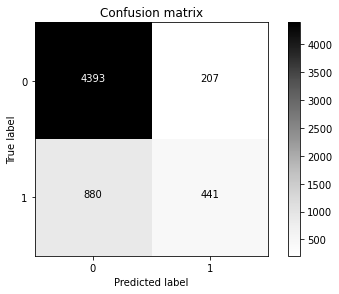

In [ ]:
#Reporte de Matriz de Confusión Modelo AdaBoost
CM_AdaBoost = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
plot = (plot_confusion_matrix(CM_AdaBoost))
plt.savefig('Confusion Matrix AdaBoost')

In [ ]:
# Se importa la libreria de modelo correspondiente
from sklearn.ensemble import RandomForestClassifier

# Se crean los parametros correspondientes al modelo, esto con el objetivo de optimizarlos por medio de la librería GridSearchCV
parameters = [{'max_depth': [6,7,8],
             'criterion' : ['gini'],
             'n_estimators':[120,140]}]


# Se ejecuta la librería GridSearchCV
RandomForest = GridSearchCV(
    RandomForestClassifier(),
    parameters,
    cv=4
)

# Entrenamiento del modelo y selección de la combinación óptima de parámetros
RandomForest.fit(X_train, y_train)
y_pred_test = RandomForest.predict(X_test)

# Evaluación para matriz de confusión
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)

# Calculo del tiempo en ejecución y definición de metricas
start_time = time.time()
metrics.loc['accuracy','RandomForest'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['f1_score','RandomForest'] = f1_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','RandomForest'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','RandomForest'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','RandomForest'] = roc_auc_score(y_pred_test, y_test)
metrics.loc['Tiempo de ejecución','RandomForest'] = (time.time() - start_time)



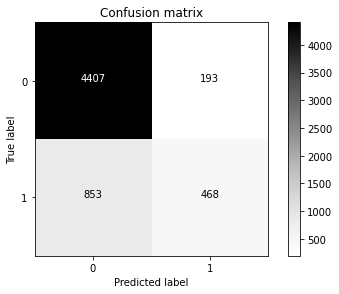

In [ ]:
#Reporte de Matriz de Confusión Modelo RandomForest
CM_RandomForest = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
plot = (plot_confusion_matrix(CM_RandomForest))
plt.savefig('Confusion Matrix RandomForest')

In [ ]:
# Se importa la libreria de modelo correspondiente
from sklearn.ensemble import GradientBoostingClassifier

# Se crean los parametros correspondientes al modelo, esto con el objetivo de optimizarlos por medio de la librería GridSearchCV
parameters = [{}]

# Se ejecuta la librería GridSearchCV
GradientBoosting = GridSearchCV(
    GradientBoostingClassifier(),
    parameters,
    cv=4
)

# Entrenamiento del modelo y selección de la combinación óptima de parámetros
GradientBoosting.fit(X_train, y_train)
y_pred_test = GradientBoosting.predict(X_test)

# Evaluación para matriz de confusión
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)

# Calculo del tiempo en ejecución y definición de metricas
start_time = time.time()
metrics.loc['accuracy','GradientBoosting'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['f1_score','GradientBoosting'] = f1_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','GradientBoosting'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','GradientBoosting'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','GradientBoosting'] = roc_auc_score(y_pred_test, y_test)
metrics.loc['Tiempo de ejecución','GradientBoosting'] = (time.time() - start_time)

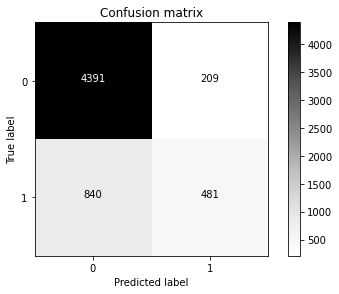

In [ ]:
#Reporte de Matriz de Confusión Modelo GradientBoosting
CM_GradientBoosting = confusion_matrix(y_pred=y_pred_test, y_true=y_test)


plot = (plot_confusion_matrix(CM_GradientBoosting))
plt.savefig('Confusion Matrix GradientBoosting')

### Redes Neuronales

In [ ]:
# Se importa la libreria de modelo correspondiente
from sklearn.neural_network import MLPClassifier

# # Se crean los parametros correspondientes al modelo, esto con el objetivo de optimizarlos por medio de la librería GridSearchCV
parameters = [{'hidden_layer_sizes': [(10,)],
               'activation': ['logistic'],
               'solver': ['sgd'],
               'alpha': [0.0],
               'verbose': [False],
               'shuffle': [True],
               'tol': [1e-4],
               'max_iter': [20000],
               'momentum': [0.9],
               'learning_rate': ['adaptive'],
               'learning_rate_init': [0.1],
               'nesterovs_momentum': [False]}]

# Se ejecuta la librería GridSearchCV
RedesNeuronales = GridSearchCV(
    MLPClassifier(),
    parameters,
    cv=4
)

#
# El parámetro hidden_layer_sizes recibe una tupla que
# indica la cantidad de neuronas de cada capa oculta. En
# el caso presentado, el valor (6,) indica que hay una sola
# capa oculta con 6 neuronas que usan la función sigmoidea.
# El parámetro solver = 'sgd' indica que se usará el
# algoritmo de gradiente descendente estocástico para entrenar
# la red neuronal.
#

# Entrenamiento del modelo y selección de la combinación óptima de parámetros
RedesNeuronales.fit(X_train, y_train)
y_pred_test = RedesNeuronales.predict(X_test)

# Evaluación para matriz de confusión
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)

# Calculo del tiempo en ejecución y definición de metricas
start_time = time.time()
metrics.loc['accuracy','RedesNeuronales'] = accuracy_score(y_true=y_test, y_pred=y_pred_test)
metrics.loc['f1_score','RedesNeuronales'] = f1_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','RedesNeuronales'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','RedesNeuronales'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','RedesNeuronales'] = roc_auc_score(y_pred_test, y_test)
metrics.loc['Tiempo de ejecución','RedesNeuronales'] = (time.time() - start_time)


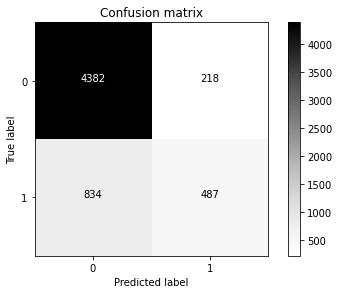

In [ ]:
#Reporte de Matriz de Confusión Modelo RedesNeuronales
CM_RedesNeuronales = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
plot = (plot_confusion_matrix(CM_RedesNeuronales))
plt.savefig('Confusion Matrix RedesNeuronales')

### SVC

In [ ]:
# Se importa la libreria de modelo correspondiente
from sklearn.svm import SVC

# Se crean los parametros correspondientes al modelo, esto con el objetivo de optimizarlos por medio de la librería GridSearchCV
parameters = [{'C':np.linspace(0.0,1,3),
               'kernel': ["sigmoid"],
               'gamma': ["scale"]}]
# Se ejecuta la librería GridSearchCV

svc = GridSearchCV(
    SVC(),
    parameters,
    cv=4
)

# Entrenamiento del modelo y selección de la combinación óptima de parámetros
svc.fit(X_train, y_train)
y_pred_test = svc.predict(X_test)

# Evaluación para matriz de confusión
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)

# Calculo del tiempo en ejecución y definición de metricas
start_time = time.time()
metrics.loc['accuracy','SVMs'] = accuracy_score(y_true=y_test, y_pred=y_pred_test)
metrics.loc['f1_score','SVMs'] = f1_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','SVMs'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','SVMs'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','SVMs'] = roc_auc_score(y_pred_test, y_test)
metrics.loc['Tiempo de ejecución','SVMs'] = (time.time() - start_time)

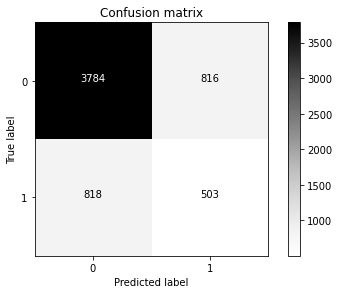

In [ ]:
#Reporte de Matriz de Confusión Modelo SVM
CM_SVM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
plot = (plot_confusion_matrix(CM_SVM))
plt.savefig('Confusion Matrix SVM')

## Resultados de Modelos

In [ ]:
metrics.to_csv('Metricas.csv')
metrics

,BernoulliNB,GaussianNB,LogisticRegresion,kNN,DecisionTree,AdaBoost,RandomForest,GradientBoosting,RedesNeuronales,SVMs
accuracy,0.809492,0.809492,0.811687,0.808647,0.82351,0.816416,0.823341,0.822834,0.822327,0.724033
f1_score,0.510841,0.510841,0.366117,0.439386,0.488497,0.447943,0.47225,0.478369,0.48075,0.381061
precision,0.59797,0.59797,0.73516,0.634286,0.691136,0.680556,0.708018,0.697101,0.69078,0.38135
recall,0.445874,0.445874,0.243755,0.336109,0.377744,0.333838,0.354277,0.364118,0.36866,0.380772
roc_auc_score,0.724836,0.724836,0.77648,0.733155,0.766514,0.756834,0.772925,0.76826,0.765444,0.6018
Tiempo de ejecución,0.0168819,0.0162482,0.0312405,0.0115082,0.011189,0.0112319,0.0112522,0.0121202,0.0164688,0.0112934


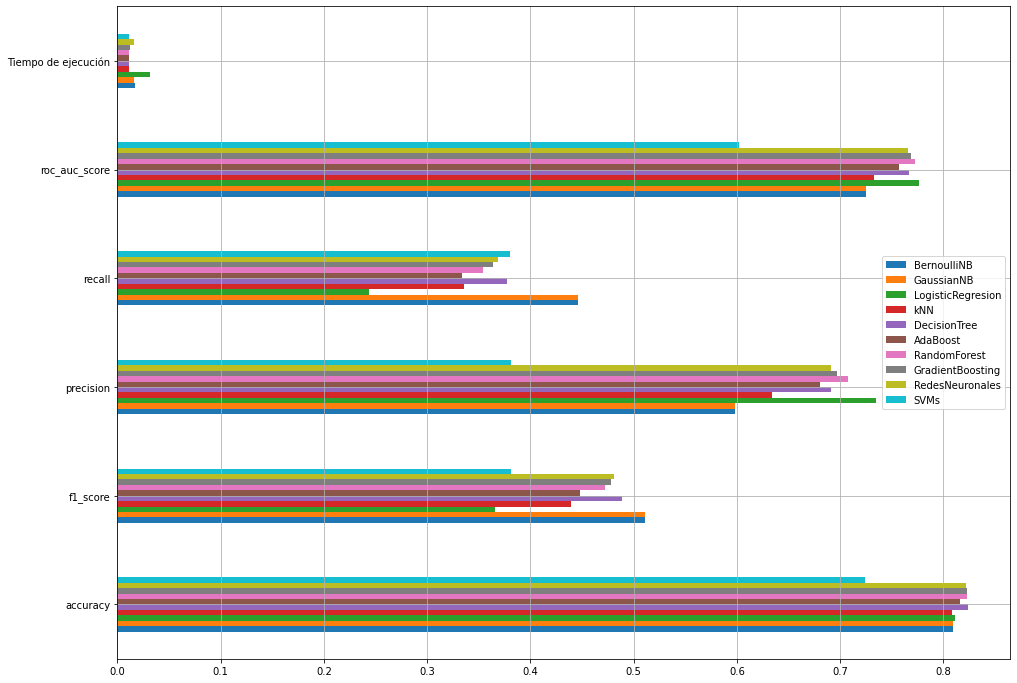

In [ ]:
fig, ax = plt.subplots(figsize = (16, 12))
metrics.plot(kind='barh', ax=ax)
ax.grid()
plt.savefig("Resumen Metricas");

# Prueba Inputs
# Inputs


In [ ]:
# Probar los modelos cruzados con inputs propios 
# ---------Campos Inputs-------
limit_bal = int(input("Amount of given credit in NT dollars: "))
sex	= int(input("Sex: [Mujer=0] o [Hombre=1]: " ))
education	= int(input("Education: 1 = Graduate school, 2 = University, 3 = High school, 4 = Others): " ))
marriage	= int(input("Marital status (1=married, 2=single, 3=others): " ))
age	= int(input("Age: "))	
pay_0	= int(input("pay_0: "))
pay_2	= int(input("pay_2: "))	
pay_3	= int(input("pay_3: "))	
pay_4	= int(input("pay_4: "))
pay_5	= int(input("pay_5: "))	
pay_6	= int(input("pay_6: "))
bill_amt1	= int(input("bill_amt1: "))
bill_amt2	= int(input("bill_amt2: "))	
bill_amt3	= int(input("bill_amt3: "))		
bill_amt4	= int(input("bill_amt4: "))		
bill_amt5	= int(input("bill_amt5: "))	
bill_amt6	= int(input("bill_amt6: "))		
pay_amt1	= int(input("pay_amt1: "))
pay_amt2	= int(input("pay_amt2: "))
pay_amt3	= int(input("pay_amt3: "))	
pay_amt4	= int(input("pay_amt4: "))
pay_amt5	= int(input("pay_amt5: "))
pay_amt6	= int(input("pay_amt611: "))
# Convertir inputs en lista 
Xnew = [[limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6]]
ynew = gnb.predict(Xnew)
print("Variables = %s, Predicted = %s" % (Xnew[0], ynew[0]))


In [ ]:
# Prueba de todos los Modelos con un quick_inputs 

Xnew = [[20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0]]
ynew_BernoulliNB = gnb.predict(Xnew)
ynew_GaussianNB = gaussian.predict(Xnew)
ynew_LogisticRegresion = logisticRegression.predict(Xnew)
ynew_kNN = knn.predict(Xnew)
ynew_DecisionTree = decisiontree.predict(Xnew)
ynew_AdaBoost = AdaBoost.predict(Xnew)
ynew_RandomForest = RandomForest.predict(Xnew)
ynew_GradientBoosting = GradientBoosting.predict(Xnew)
ynew_RedesNeuronales = RedesNeuronales.predict(Xnew)
ynew_SVMs = svc.predict(Xnew)

print("Variables = %s, Predicted = %s" % (Xnew[0], ynew_BernoulliNB[0]))
print("Variables = %s, Predicted = %s" % (Xnew[0], ynew_GaussianNB[0]))
print("Variables = %s, Predicted = %s" % (Xnew[0], ynew_LogisticRegresion[0]))
print("Variables = %s, Predicted = %s" % (Xnew[0], ynew_DecisionTree[0]))
print("Variables = %s, Predicted = %s" % (Xnew[0], ynew_AdaBoost[0]))
print("Variables = %s, Predicted = %s" % (Xnew[0], ynew_RandomForest[0]))
print("Variables = %s, Predicted = %s" % (Xnew[0], ynew_GradientBoosting[0]))
print("Variables = %s, Predicted = %s" % (Xnew[0], ynew_RedesNeuronales[0]))
print("Variables = %s, Predicted = %s" % (Xnew[0], ynew_SVMs[0]))

Variables = [20000, 2, 2, 1, 24, 2, 2, -1, -1, -2, -2, 3913, 3102, 689, 0, 0, 0, 0, 689, 0, 0, 0, 0], Predicted = 1
Variables = [20000, 2, 2, 1, 24, 2, 2, -1, -1, -2, -2, 3913, 3102, 689, 0, 0, 0, 0, 689, 0, 0, 0, 0], Predicted = 0
Variables = [20000, 2, 2, 1, 24, 2, 2, -1, -1, -2, -2, 3913, 3102, 689, 0, 0, 0, 0, 689, 0, 0, 0, 0], Predicted = 0
Variables = [20000, 2, 2, 1, 24, 2, 2, -1, -1, -2, -2, 3913, 3102, 689, 0, 0, 0, 0, 689, 0, 0, 0, 0], Predicted = 1
Variables = [20000, 2, 2, 1, 24, 2, 2, -1, -1, -2, -2, 3913, 3102, 689, 0, 0, 0, 0, 689, 0, 0, 0, 0], Predicted = 0
Variables = [20000, 2, 2, 1, 24, 2, 2, -1, -1, -2, -2, 3913, 3102, 689, 0, 0, 0, 0, 689, 0, 0, 0, 0], Predicted = 0
Variables = [20000, 2, 2, 1, 24, 2, 2, -1, -1, -2, -2, 3913, 3102, 689, 0, 0, 0, 0, 689, 0, 0, 0, 0], Predicted = 1
Variables = [20000, 2, 2, 1, 24, 2, 2, -1, -1, -2, -2, 3913, 3102, 689, 0, 0, 0, 0, 689, 0, 0, 0, 0], Predicted = 0
Variables = [20000, 2, 2, 1, 24, 2, 2, -1, -1, -2, -2, 3913, 3102, 689, 